In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="dark")

fear_greed = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

In [3]:
fear_greed['date'] = pd.to_datetime(fear_greed['date'])

In [4]:
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True
)
trades['date'] = trades['Timestamp IST'].dt.date
trades['date'] = pd.to_datetime(trades['date'])

In [5]:
merged = trades.merge(
    fear_greed[['date', 'classification']],
    on='date',
    how='left'
)

In [6]:
merged['win'] = merged['Closed PnL'] > 0

In [7]:
daily_perf = merged.groupby(
    ['Account', 'date', 'classification']
).agg(
    total_pnl=('Closed PnL', 'sum'),
    trade_count=('Closed PnL', 'count'),
    win_rate=('win', 'mean')
).reset_index()

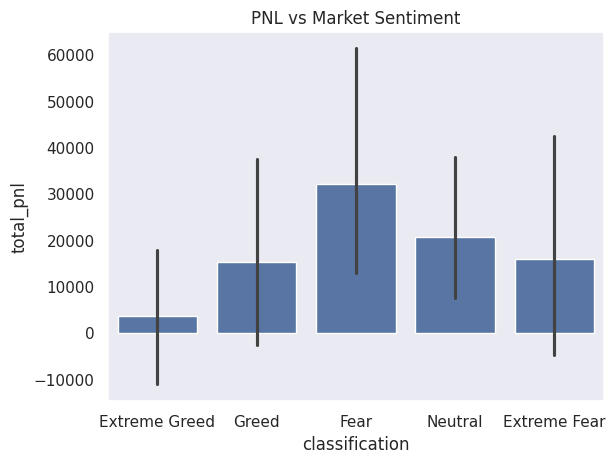

In [8]:
# Does sentiment affect profit?
daily_perf.groupby('classification')['total_pnl'].mean()
sns.barplot(
    x='classification',
    y='total_pnl',
    data=daily_perf
)
plt.title("PNL vs Market Sentiment")
plt.show()


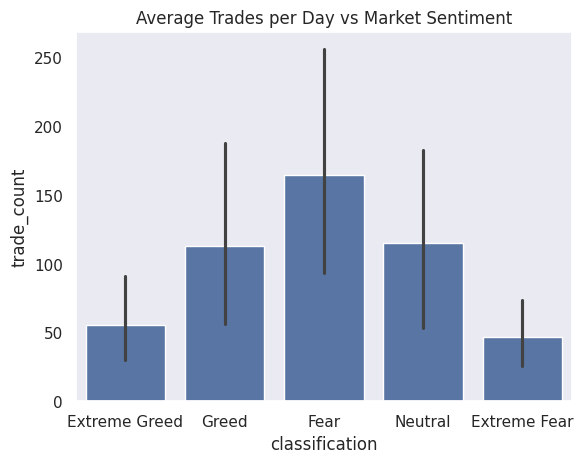

In [9]:
# Do traders trade more during Greed?
daily_perf.groupby('classification')['trade_count'].mean()
sns.barplot(
    x='classification',
    y='trade_count',
    data=daily_perf
)
plt.title("Average Trades per Day vs Market Sentiment")
plt.show()

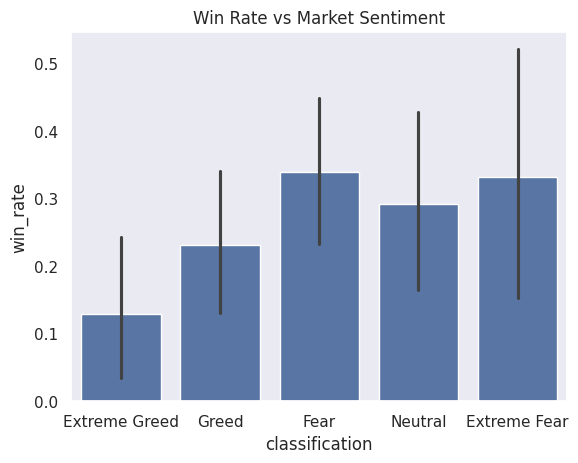

In [10]:
# Is win rate higher during Greed?
daily_perf.groupby('classification')['win_rate'].mean()
sns.barplot(
    x='classification',
    y='win_rate',
    data=daily_perf
)
plt.title("Win Rate vs Market Sentiment")
plt.show()

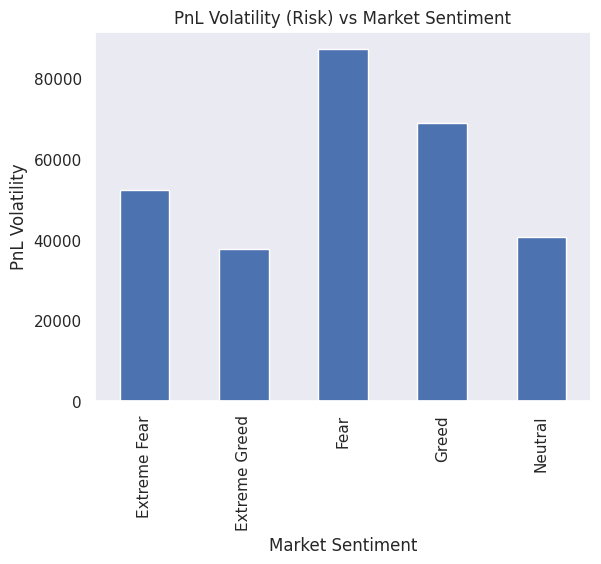

In [11]:
# Risk (Volatility) vs Sentiment
risk_by_sentiment = daily_perf.groupby('classification')['total_pnl'].std()
risk_by_sentiment

risk_by_sentiment.plot(
    kind='bar',
    title="PnL Volatility (Risk) vs Market Sentiment"
)
plt.ylabel("PnL Volatility")
plt.xlabel("Market Sentiment")
plt.show()